In [3]:
#Import Dependency
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

#Generate Data
np.random.seed(3)
x = np.random.uniform(140, 200, size=1030)
y = (x >= np.mean(x)).astype(int)

#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#Model neural network single layer
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(1,))
    #Input shape menentukan neuron input
    #Units menentukan jumlah neuron pada output layer
])

#Compiling model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

class MyCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs=None):
            if logs.get('accuracy') >= 0.95 and logs.get('loss') < 0.4:
                print(f"\nTraining reached the desired accuracy and loss. Stopping training.")
                self.model.stop_training = True

#Fitting/Latih model
history = model.fit(x_train, y_train, epochs=1000, batch_size=10, callbacks=[MyCallback()])

#Evaluasi model
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:", accuracy)
print("Loss:", loss)

Epoch 1/1000
83/83 [==============================] - 1s 1ms/step - loss: 24.7106 - accuracy: 0.5061
Epoch 2/1000
83/83 [==============================] - 0s 1ms/step - loss: 17.5468 - accuracy: 0.5061
Epoch 3/1000
83/83 [==============================] - 0s 1ms/step - loss: 10.3227 - accuracy: 0.5061
Epoch 4/1000
83/83 [==============================] - 0s 2ms/step - loss: 3.2379 - accuracy: 0.4988
Epoch 5/1000
83/83 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.4672
Epoch 6/1000
83/83 [==============================] - 0s 1ms/step - loss: 0.7048 - accuracy: 0.4296
Epoch 7/1000
83/83 [==============================] - 0s 1ms/step - loss: 0.7050 - accuracy: 0.4417
Epoch 8/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.7056 - accuracy: 0.4417
Epoch 9/1000
83/83 [==============================] - 0s 1ms/step - loss: 0.7052 - accuracy: 0.4697
Epoch 10/1000
83/83 [==============================] - 0s 2ms/step - loss: 0.7050 - accuracy: 0.4

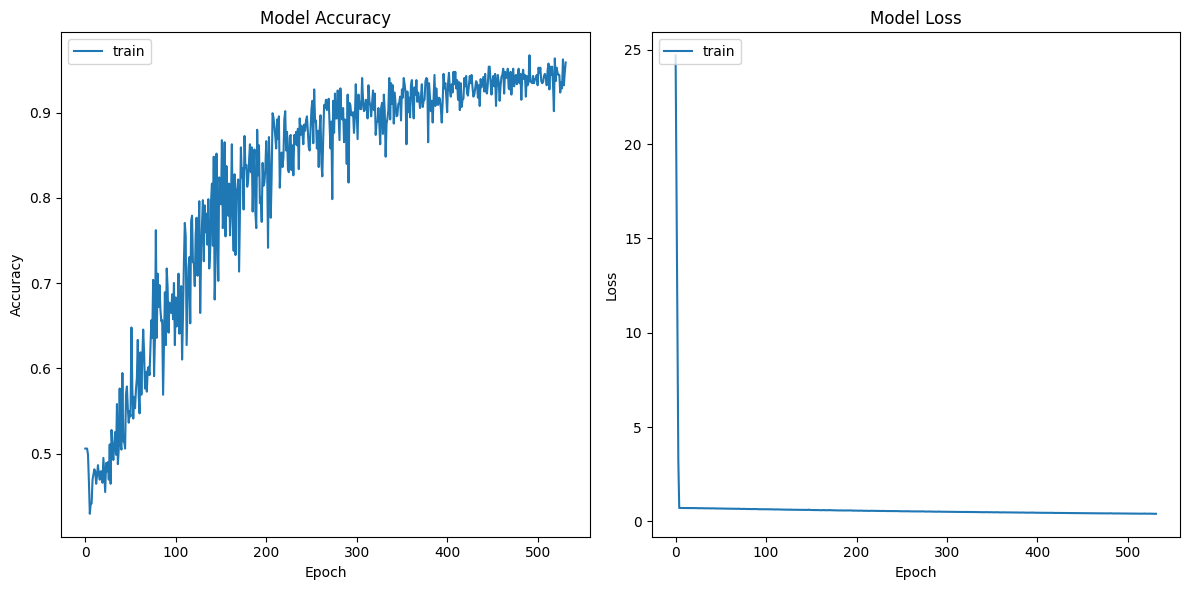

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train'], loc='upper left')

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train'], loc='upper left')

plt.tight_layout()
plt.show()